# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
# reading the CSV file into pandas dataframe

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None, sep='\s+',)
df.head(10)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None, sep='\s+',)

In [4]:
df1.columns = ['MPG', 'CYLINDERS', 'DISPLACEMENT', 'HORSEPOWER', 'WEIGHT', 'ACCELERATION', 'MODEL YEAR', 'ORIGIN', 'CAR NAME']

In [5]:
df1.head(10)

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL YEAR,ORIGIN,CAR NAME
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [6]:
# reading datatype of each column in the dataframe
df1.dtypes

MPG             float64
CYLINDERS         int64
DISPLACEMENT    float64
HORSEPOWER       object
WEIGHT          float64
ACCELERATION    float64
MODEL YEAR        int64
ORIGIN            int64
CAR NAME         object
dtype: object

In [7]:
# shape of the dataframe
df1.shape

(398, 9)

In [8]:
# Descriptive analysis of the dataframe
df1.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
CYLINDERS,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
DISPLACEMENT,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
WEIGHT,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
ACCELERATION,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
MODEL YEAR,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
ORIGIN,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [39]:
# Checking for any missing values

df1[df1.isnull().any(axis=1)]

,MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL YEAR,ORIGIN,CAR NAME
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [34]:
# replacing '?' values to nan
df1 = df1.replace('?', np.nan)

In [35]:
# Convert 'Horsepower' values from Object to int

df1['HORSEPOWER'] = df1['HORSEPOWER'].astype('float64')

In [40]:
# Descriptive analysis of the dataframe
df1.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
CYLINDERS,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
DISPLACEMENT,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
HORSEPOWER,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
WEIGHT,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
ACCELERATION,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
MODEL YEAR,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
ORIGIN,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [43]:
print(df1.corr())

                   MPG  CYLINDERS  DISPLACEMENT  HORSEPOWER    WEIGHT  \
MPG           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
CYLINDERS    -0.775396   1.000000      0.950721    0.842983  0.896017   
DISPLACEMENT -0.804203   0.950721      1.000000    0.897257  0.932824   
HORSEPOWER   -0.778427   0.842983      0.897257    1.000000  0.864538   
WEIGHT       -0.831741   0.896017      0.932824    0.864538  1.000000   
ACCELERATION  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
MODEL YEAR    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   
ORIGIN        0.563450  -0.562543     -0.609409   -0.455171 -0.581024   

              ACCELERATION  MODEL YEAR    ORIGIN  
MPG               0.420289    0.579267  0.563450  
CYLINDERS        -0.505419   -0.348746 -0.562543  
DISPLACEMENT     -0.543684   -0.370164 -0.609409  
HORSEPOWER       -0.689196   -0.416361 -0.455171  
WEIGHT           -0.417457   -0.306564 -0.581024  
ACCELERATION      1.000000    0.2881

C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\

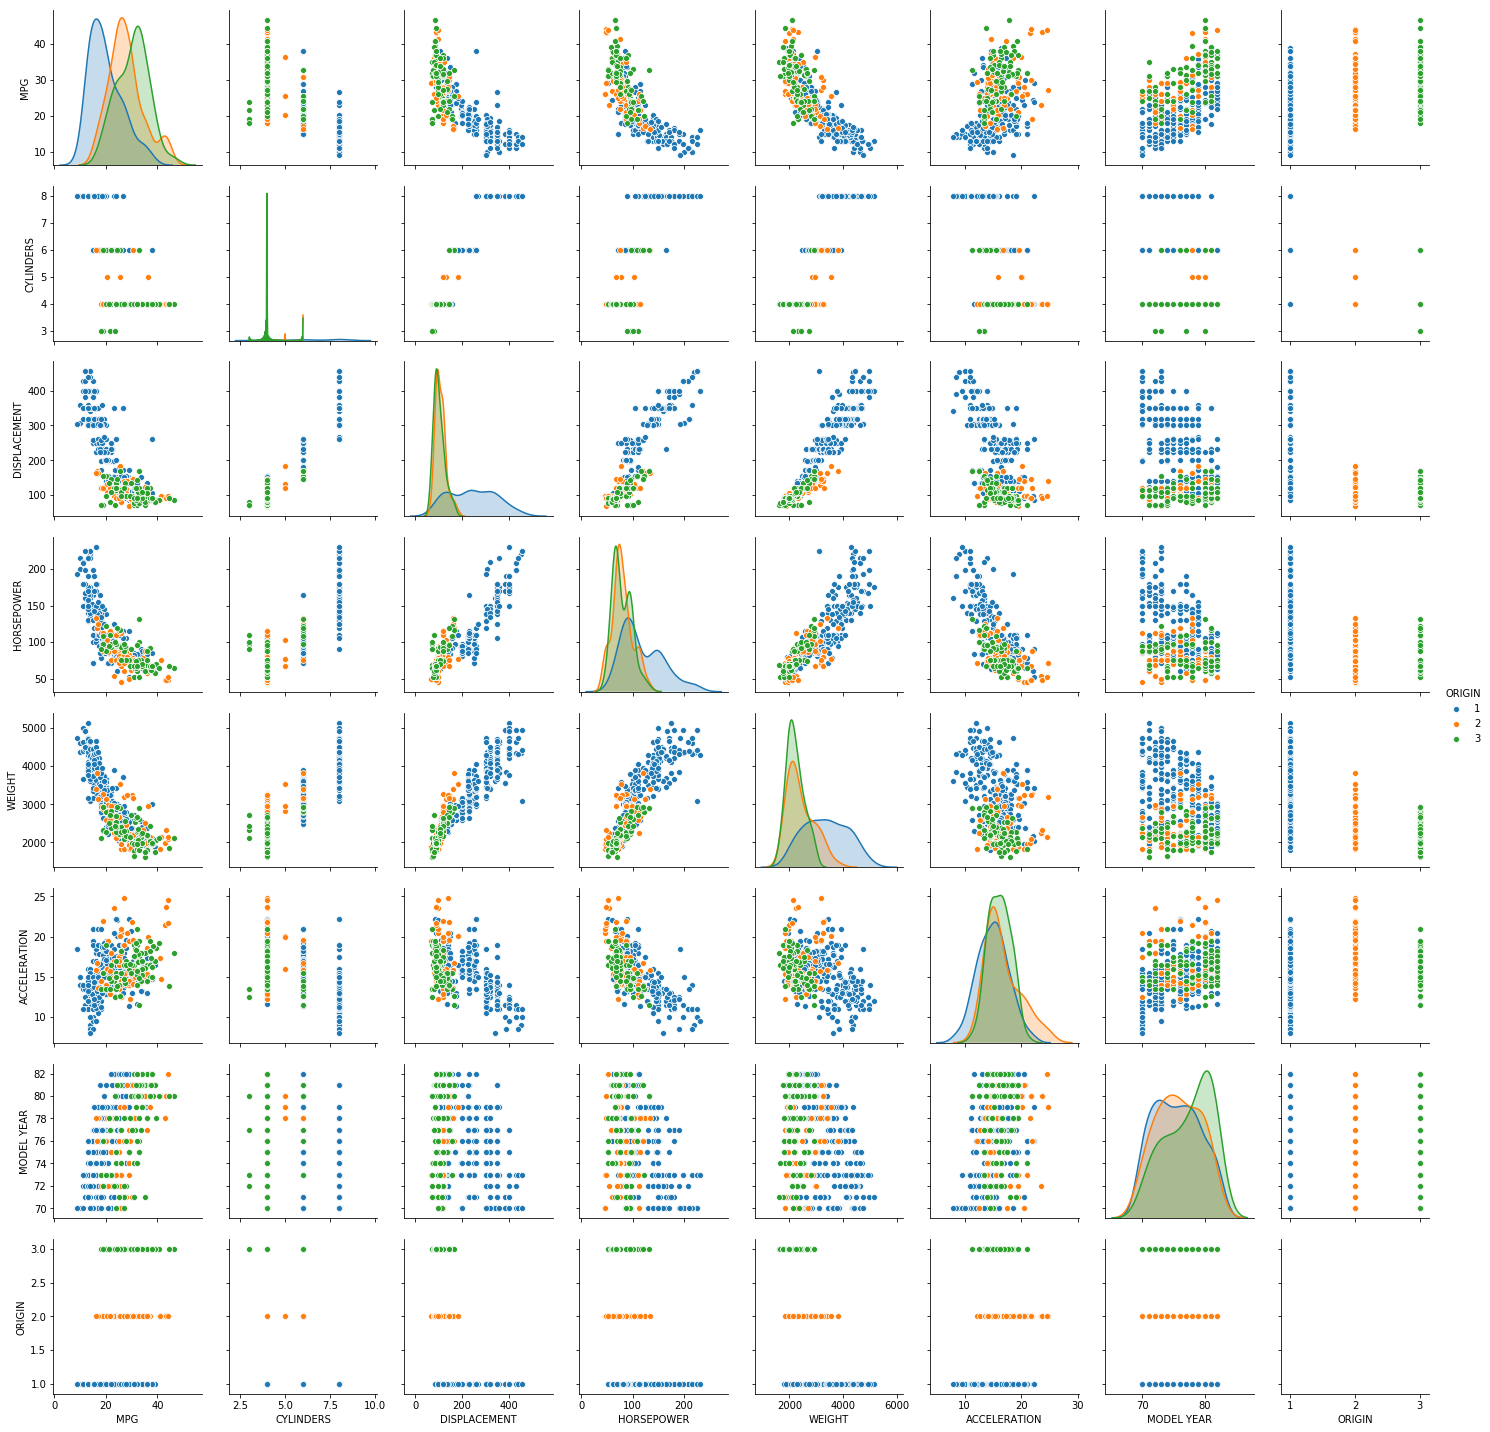

In [42]:
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = df1.iloc[:, 0:9]
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'ORIGIN')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [10]:
#Observations


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [11]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age



# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [12]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

# Q7. Create appropriate clusters with the new data set

# Q8. Identify the appropriate clusters with result from above question

# Q9. Check for no of values in each cluster and centers for each variables. 

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [13]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

NameError: name 'cars_df' is not defined

In [ ]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups